<a href="https://colab.research.google.com/github/vishnuvryeruva/Clustering-Techniques/blob/main/CLustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [43]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [44]:
data = iris.data
data.shape

(150, 4)

In [45]:
import pandas as pd
x = pd.DataFrame(data, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


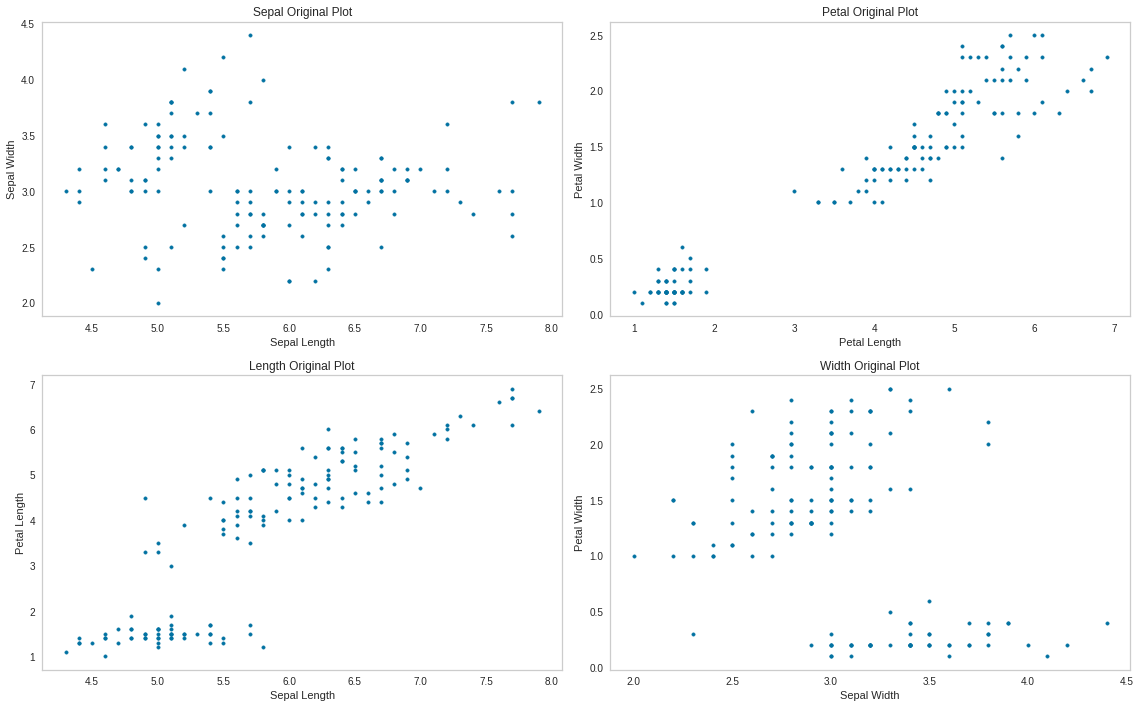

In [46]:
plt.figure(figsize=(16,10))
#scatter plot of sepal length vs sepal width 
plt.subplot(2,2,1)                                   
plt.scatter(list(x.iloc[:,0]), list(x.iloc[:,1]), marker='.')                                                                        
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Sepal Width')                                         
plt.title('Sepal Original Plot')
plt.grid()                                                                                           
plt.tight_layout()

#scatter plot of petal length vs petal width
plt.subplot(2,2,2)                                   
plt.scatter(list(x.iloc[:,2]), list(x.iloc[:,3]), marker='.')                                                                        
plt.xlabel('Petal Length')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Petal Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()


#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)                                   
plt.scatter(list(x.iloc[:,0]), list(x.iloc[:,2]), marker='.')                                                                       
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Petal Length')                                                 
plt.title('Length Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()

#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)                                   
plt.scatter(list(x.iloc[:,1]), list(x.iloc[:,3]), marker='.')                                                                       
plt.xlabel('Sepal Width')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Width Original Plot')                                            
plt.grid()                                                                 
plt.tight_layout()

In [47]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

In [48]:
k = KMeans(n_clusters=3).fit(data)
k.fit_transform(data)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

In [49]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [50]:
y_k = k.fit_predict(data)

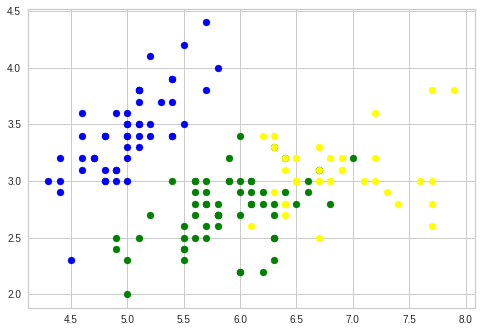

In [51]:
plt.scatter(data[y_k ==0,0],data[y_k==0,1],c='green')
plt.scatter(data[y_k ==1,0],data[y_k==1,1],c='blue')
plt.scatter(data[y_k ==2,0],data[y_k==2,1],c='yellow')

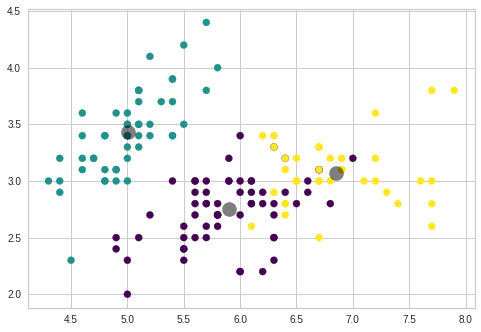

In [52]:
plt.scatter(data[:, 0], data[:, 1], c=y_k, s=50, cmap='viridis')
centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(0, 0.5, 'WCSS')

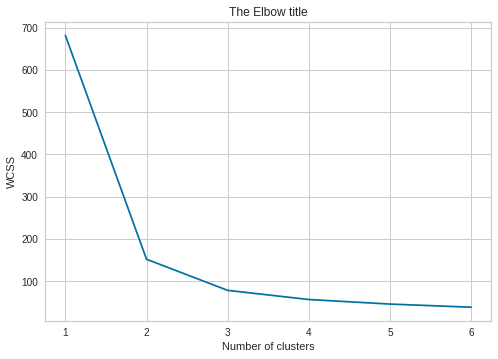

In [53]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [54]:
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [55]:
hcs = AgglomerativeClustering(linkage='single',n_clusters=3).fit(data)
hcs.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
y_hcs = hcs.fit_predict(data)

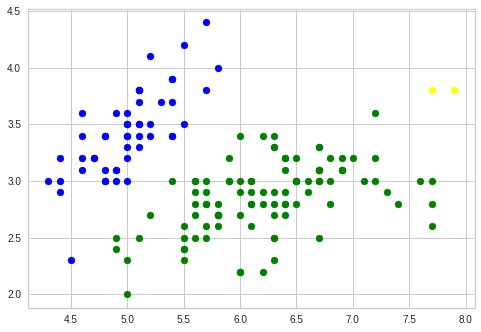

In [57]:
plt.scatter(data[y_hcs ==0,0],data[y_hcs==0,1],c='green')
plt.scatter(data[y_hcs ==1,0],data[y_hcs==1,1],c='blue')
plt.scatter(data[y_hcs ==2,0],data[y_hcs==2,1],c='yellow')

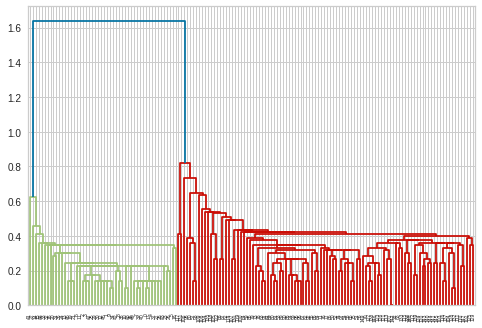

In [58]:
dendrogram = sch.dendrogram(sch.linkage(data,method='single'))

In [59]:
hcc = AgglomerativeClustering(linkage='complete',n_clusters=3).fit(data)
hcc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
y_hcc = hcc.fit_predict(data)

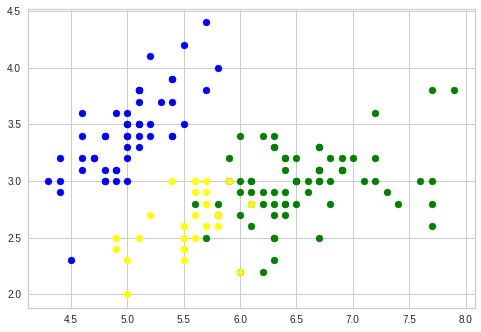

In [61]:
plt.scatter(data[y_hcc ==0,0],data[y_hcc==0,1],c='green')
plt.scatter(data[y_hcc ==1,0],data[y_hcc==1,1],c='blue')
plt.scatter(data[y_hcc ==2,0],data[y_hcc==2,1],c='yellow')

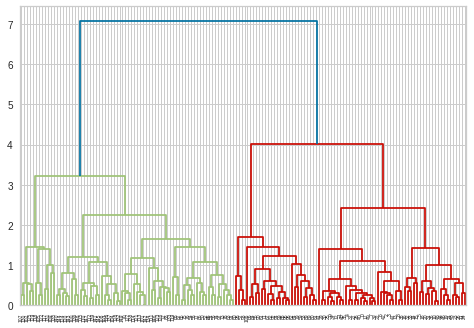

In [62]:
dendrogram = sch.dendrogram(sch.linkage(data,method='complete'))

In [63]:
hca = AgglomerativeClustering(linkage='average',n_clusters=3).fit(data)
hca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [64]:
y_hca = hca.fit_predict(data)

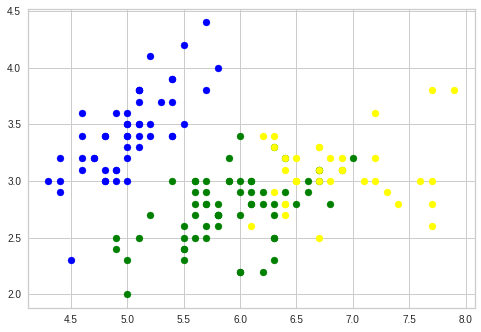

In [65]:
plt.scatter(data[y_hca ==0,0],data[y_hca==0,1],c='green')
plt.scatter(data[y_hca ==1,0],data[y_hca==1,1],c='blue')
plt.scatter(data[y_hca ==2,0],data[y_hca==2,1],c='yellow')

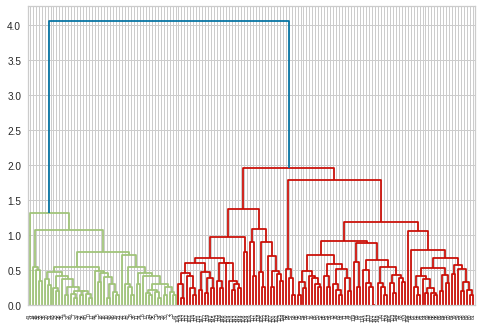

In [66]:
dendrogram = sch.dendrogram(sch.linkage(data,method='average'))

In [67]:
from sklearn.mixture import GaussianMixture

In [68]:
gmm = GaussianMixture(n_components=3).fit(data)
y_gmm = gmm.fit_predict(data)
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

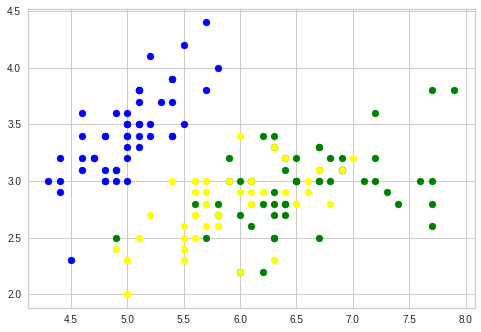

In [69]:
plt.scatter(data[y_gmm ==0,0],data[y_gmm==0,1],c='green')
plt.scatter(data[y_gmm ==1,0],data[y_gmm==1,1],c='blue')
plt.scatter(data[y_gmm ==2,0],data[y_gmm==2,1],c='yellow')

In [70]:
!pip install pycaret

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [71]:
!pip install --upgrade numpy

  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
pycaret 2.3.5 requires numpy==1.19.5, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [72]:
# Importing module and initializing setup
from pycaret.datasets import get_data

In [73]:
dataset = get_data("iris")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
from pycaret.clustering import *

In [ ]:
clust = setup(data=x)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:27:04
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Sepal Length,Numeric
Sepal Width,Numeric
Petal Length,Numeric
Petal Width,Numeric


In [ ]:
dbscan = create_model('dbscan')

In [ ]:
dbscan_df = assign_model(dbscan)

In [ ]:
plot_model(dbscan, plot = 'cluster')

In [ ]:
plot_model(dbscan, plot = 'tsne')

In [ ]:
evaluate_model(dbscan)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbs = DBSCAN().fit(data)
dbs.labels_

In [ ]:
y_dbs = dbs.fit_predict(data)

In [ ]:
plt.scatter(data[y_dbs ==0,0],data[y_dbs==0,1],c='green')
plt.scatter(data[y_dbs ==1,0],data[y_dbs==1,1],c='blue')
plt.scatter(data[y_dbs ==2,0],data[y_dbs==2,1],c='yellow')

#**References**
#####https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/
#####https://www.youtube.com/watch?v=wzqA8ztUyqI&ab_channel=prabhanjantrivedi
#####https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
#####https://pycaret.readthedocs.io/en/latest/api/clustering.html